## Data loading and preprocessing 

In [1]:
import pandas as pd
import numpy as np

# File paths for incongruent and neutral data
file_path_incongruent = 'Hb_I_1.xlsx'
file_path_neutral = 'Hb_N_1.xlsx'

# Read data from the .xlsx files
xls_incongruent = pd.ExcelFile(file_path_incongruent)
xls_neutral = pd.ExcelFile(file_path_neutral)

# Initialize lists to store features, labels, and participant names
incongruent_features = []
neutral_features = []
participants_incongruent = []
participants_neutral = []

# Process incongruent data
for sheet_name in xls_incongruent.sheet_names:
    df = pd.read_excel(xls_incongruent, sheet_name=sheet_name)

    # Feature engineering: Calculate mean and standard deviation for each channel
    participant_features_incongruent = []
    for channel in df.columns:
        participant_features_incongruent.append(df[channel].mean())
        participant_features_incongruent.append(df[channel].std())

    # Append features and participant name
    incongruent_features.append(participant_features_incongruent)
    participants_incongruent.append(sheet_name)  # Participant name

# Process neutral data
for sheet_name in xls_neutral.sheet_names:
    df = pd.read_excel(xls_neutral, sheet_name=sheet_name)

    # Feature engineering: Calculate mean and standard deviation for each channel
    participant_features_neutral = []
    for channel in df.columns:
        participant_features_neutral.append(df[channel].mean())
        participant_features_neutral.append(df[channel].std())

    # Append features and participant name
    neutral_features.append(participant_features_neutral)
    participants_neutral.append(sheet_name)  # Participant name

# Convert features to numpy arrays
X_incongruent = np.array(incongruent_features)
X_neutral = np.array(neutral_features)

# Create DataFrames for incongruent and neutral datasets
columns = []
for channel in range(1, 21):
    columns.append(f'Hb_mean_channel_{channel}')
    columns.append(f'Hb_std_channel_{channel}')

incongruent_df = pd.DataFrame(X_incongruent, columns=columns)
incongruent_df['Condition'] = 'Incongruent'
incongruent_df['Participant'] = participants_incongruent

neutral_df = pd.DataFrame(X_neutral, columns=columns)
neutral_df['Condition'] = 'Neutral'
neutral_df['Participant'] = participants_neutral

# Merge incongruent and neutral DataFrames
combined_df = pd.concat([incongruent_df, neutral_df], ignore_index=True)

# Add labels (1 for incongruent, 0 for neutral)
labels_incongruent = np.ones(len(incongruent_df), dtype=int)
labels_neutral = np.zeros(len(neutral_df), dtype=int)
labels = np.concatenate([labels_incongruent, labels_neutral])

combined_df['Label'] = labels

# Save the combined dataset to a CSV file
combined_df.to_csv('combined_dataset_with_labels.csv', index=False)
print("Combined dataset saved to 'combined_dataset_with_labels.csv'")


Combined dataset saved to 'combined_dataset_with_labels.csv'


In [2]:
import pandas as pd
import numpy as np

def process_fNIRS_data(file_path_incongruent, file_path_neutral):
    # Read data from the .xlsx files
    xls_incongruent = pd.ExcelFile(file_path_incongruent)
    xls_neutral = pd.ExcelFile(file_path_neutral)

    # Initialize lists to store features, labels, and participant names
    incongruent_features = []
    neutral_features = []
    participants_incongruent = []
    participants_neutral = []

    # Process incongruent data
    for sheet_name in xls_incongruent.sheet_names:
        df = pd.read_excel(xls_incongruent, sheet_name=sheet_name)

        # Feature engineering: Calculate mean and standard deviation for each channel
        participant_features_incongruent = []
        for channel in df.columns:
            participant_features_incongruent.append(df[channel].mean())
            participant_features_incongruent.append(df[channel].std())

        # Append features and participant name
        incongruent_features.append(participant_features_incongruent)
        participants_incongruent.append(sheet_name)  # Participant name

    # Process neutral data
    for sheet_name in xls_neutral.sheet_names:
        df = pd.read_excel(xls_neutral, sheet_name=sheet_name)

        # Feature engineering: Calculate mean and standard deviation for each channel
        participant_features_neutral = []
        for channel in df.columns:
            participant_features_neutral.append(df[channel].mean())
            participant_features_neutral.append(df[channel].std())

        # Append features and participant name
        neutral_features.append(participant_features_neutral)
        participants_neutral.append(sheet_name)  # Participant name

    # Convert features to numpy arrays
    X_incongruent = np.array(incongruent_features)
    X_neutral = np.array(neutral_features)

    # Create DataFrames for incongruent and neutral datasets
    columns = []
    for channel in range(1, 21):
        columns.append(f'HbO_mean_channel_{channel}')
        columns.append(f'HbO_std_channel_{channel}')

    incongruent_df = pd.DataFrame(X_incongruent, columns=columns)
    incongruent_df['Condition'] = 'Incongruent'
    incongruent_df['Participant'] = participants_incongruent

    neutral_df = pd.DataFrame(X_neutral, columns=columns)
    neutral_df['Condition'] = 'Neutral'
    neutral_df['Participant'] = participants_neutral

    # Merge incongruent and neutral DataFrames
    combined_df = pd.concat([incongruent_df, neutral_df], ignore_index=True)

    # Add labels (1 for incongruent, 0 for neutral)
    labels_incongruent = np.ones(len(incongruent_df), dtype=int)
    labels_neutral = np.zeros(len(neutral_df), dtype=int)
    labels = np.concatenate([labels_incongruent, labels_neutral])

    combined_df['Label'] = labels

    # Save the combined dataset to a CSV file
    combined_df.to_csv('HBO_Combined.csv', index=False)
    print("Combined dataset saved to 'HBO_Combined.csv'")

# Example usage:
process_fNIRS_data('HbO_I_1.xlsx', 'HbO_N_1.xlsx')


Combined dataset saved to 'HBO_Combined.csv'


## EXPLORATORY DATA ANALYSIS 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
hb_path = 'HB_Combined.csv'
hbo_path = 'HBO_Combined.csv'

hb_df = pd.read_csv(hb_path)
hbo_df = pd.read_csv(hbo_path)

# Display the first few rows of each dataset
print("Hb Dataset:")
print(hb_df.head(5))





Hb Dataset:
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000106          0.000192           0.000063          0.000168   
1          -0.000050          0.000093          -0.000157          0.000112   
2           0.000107          0.000057           0.000137          0.000088   
3          -0.001730          0.003278          -0.001091          0.000937   
4           0.000483          0.000437           0.000453          0.000465   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0           0.000076          0.000152          -0.000166          0.000252   
1          -0.000153          0.000100          -0.000080          0.000076   
2           0.000306          0.000164           0.000259          0.000091   
3          -0.000744          0.000849          -0.000549          0.000719   
4           0.000410          0.000372           0.000462          0.000365   

   Hb_mean_channel_5  Hb_std_channel_5

In [5]:
print("\nHbO Dataset:")
print(hbo_df.head(5))


HbO Dataset:
   HbO_mean_channel_1  HbO_std_channel_1  HbO_mean_channel_2  \
0            0.000189           0.000217           -0.000056   
1           -0.000234           0.000187           -0.000104   
2            0.000029           0.000113           -0.000071   
3            0.002225           0.003412            0.001905   
4           -0.000580           0.000479           -0.000604   

   HbO_std_channel_2  HbO_mean_channel_3  HbO_std_channel_3  \
0           0.000200           -0.000043           0.000222   
1           0.000135           -0.000190           0.000210   
2           0.000193           -0.000124           0.000109   
3           0.001089            0.001259           0.000893   
4           0.000400           -0.000470           0.000363   

   HbO_mean_channel_4  HbO_std_channel_4  HbO_mean_channel_5  \
0            0.000184           0.000318           -0.001515   
1           -0.000314           0.000214           -0.000330   
2           -0.000195         

In [6]:
# Basic statistics
print("\nHb Dataset Statistics:")
print(hb_df.describe())




Hb Dataset Statistics:
       Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  \
count          42.000000         42.000000          42.000000   
mean            0.000134          0.000432           0.000035   
std             0.001056          0.000802           0.000524   
min            -0.001730          0.000050          -0.001675   
25%            -0.000099          0.000120          -0.000154   
50%            -0.000022          0.000187           0.000024   
75%             0.000217          0.000400           0.000276   
max             0.005939          0.004340           0.001786   

       Hb_std_channel_2  Hb_mean_channel_3  Hb_std_channel_3  \
count         42.000000          42.000000         42.000000   
mean           0.000392          -0.000040          0.000285   
std            0.000445           0.000444          0.000258   
min            0.000075          -0.001810          0.000080   
25%            0.000129          -0.000185          0.000116   
50%   

In [7]:
print("\nHbO Dataset Statistics:")
print(hbo_df.describe())


HbO Dataset Statistics:
       HbO_mean_channel_1  HbO_std_channel_1  HbO_mean_channel_2  \
count           42.000000          42.000000           42.000000   
mean            -0.000157           0.000512           -0.000085   
std              0.001162           0.000860            0.000741   
min             -0.006407           0.000079           -0.002313   
25%             -0.000238           0.000178           -0.000375   
50%             -0.000097           0.000265           -0.000083   
75%              0.000146           0.000423            0.000164   
max              0.002225           0.004741            0.001905   

       HbO_std_channel_2  HbO_mean_channel_3  HbO_std_channel_3  \
count          42.000000           42.000000          42.000000   
mean            0.000507           -0.000024           0.000349   
std             0.000574            0.000546           0.000329   
min             0.000069           -0.000938           0.000063   
25%             0.000158   

In [8]:
# Check for missing values
print("\nMissing Values in Hb Dataset:")
print(hb_df.isnull().sum())




Missing Values in Hb Dataset:
Hb_mean_channel_1     0
Hb_std_channel_1      0
Hb_mean_channel_2     0
Hb_std_channel_2      0
Hb_mean_channel_3     0
Hb_std_channel_3      0
Hb_mean_channel_4     0
Hb_std_channel_4      0
Hb_mean_channel_5     0
Hb_std_channel_5      0
Hb_mean_channel_6     0
Hb_std_channel_6      0
Hb_mean_channel_7     0
Hb_std_channel_7      0
Hb_mean_channel_8     0
Hb_std_channel_8      0
Hb_mean_channel_9     0
Hb_std_channel_9      0
Hb_mean_channel_10    0
Hb_std_channel_10     0
Hb_mean_channel_11    0
Hb_std_channel_11     0
Hb_mean_channel_12    0
Hb_std_channel_12     0
Hb_mean_channel_13    0
Hb_std_channel_13     0
Hb_mean_channel_14    0
Hb_std_channel_14     0
Hb_mean_channel_15    0
Hb_std_channel_15     0
Hb_mean_channel_16    0
Hb_std_channel_16     0
Hb_mean_channel_17    0
Hb_std_channel_17     0
Hb_mean_channel_18    0
Hb_std_channel_18     0
Hb_mean_channel_19    0
Hb_std_channel_19     0
Hb_mean_channel_20    0
Hb_std_channel_20     0
Condition

In [9]:
print("\nMissing Values in HbO Dataset:")
print(hbo_df.isnull().sum())


Missing Values in HbO Dataset:
HbO_mean_channel_1     0
HbO_std_channel_1      0
HbO_mean_channel_2     0
HbO_std_channel_2      0
HbO_mean_channel_3     0
HbO_std_channel_3      0
HbO_mean_channel_4     0
HbO_std_channel_4      0
HbO_mean_channel_5     0
HbO_std_channel_5      0
HbO_mean_channel_6     0
HbO_std_channel_6      0
HbO_mean_channel_7     0
HbO_std_channel_7      0
HbO_mean_channel_8     0
HbO_std_channel_8      0
HbO_mean_channel_9     0
HbO_std_channel_9      0
HbO_mean_channel_10    0
HbO_std_channel_10     0
HbO_mean_channel_11    0
HbO_std_channel_11     0
HbO_mean_channel_12    0
HbO_std_channel_12     0
HbO_mean_channel_13    0
HbO_std_channel_13     0
HbO_mean_channel_14    0
HbO_std_channel_14     0
HbO_mean_channel_15    0
HbO_std_channel_15     0
HbO_mean_channel_16    0
HbO_std_channel_16     0
HbO_mean_channel_17    0
HbO_std_channel_17     0
HbO_mean_channel_18    0
HbO_std_channel_18     0
HbO_mean_channel_19    0
HbO_std_channel_19     0
HbO_mean_channel_2

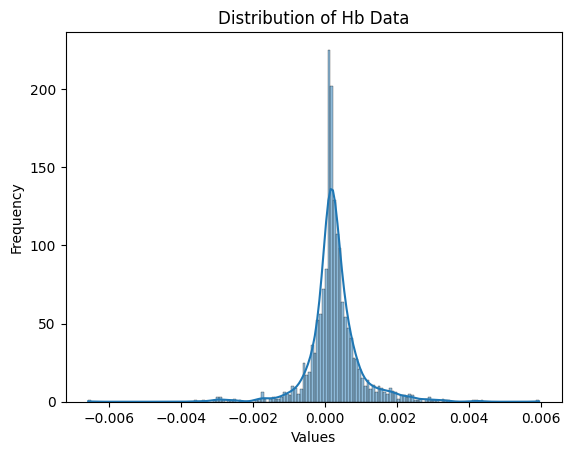

In [10]:
# Visualize the distributions of Hb and HbO data
sns.histplot(hb_df.iloc[:, :-3].values.flatten(), kde=True)
plt.title('Distribution of Hb Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


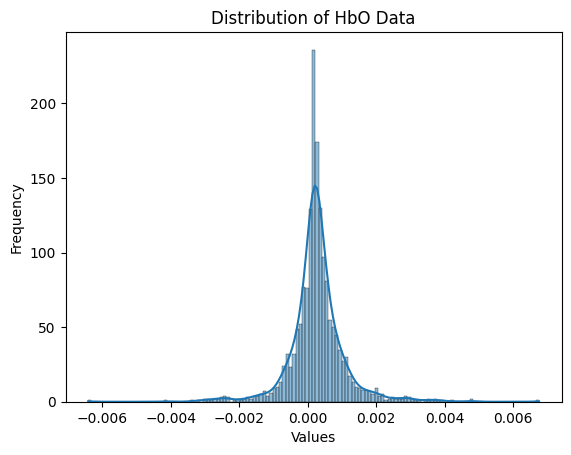

In [11]:
sns.histplot(hbo_df.iloc[:, :-3].values.flatten(), kde=True)
plt.title('Distribution of HbO Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


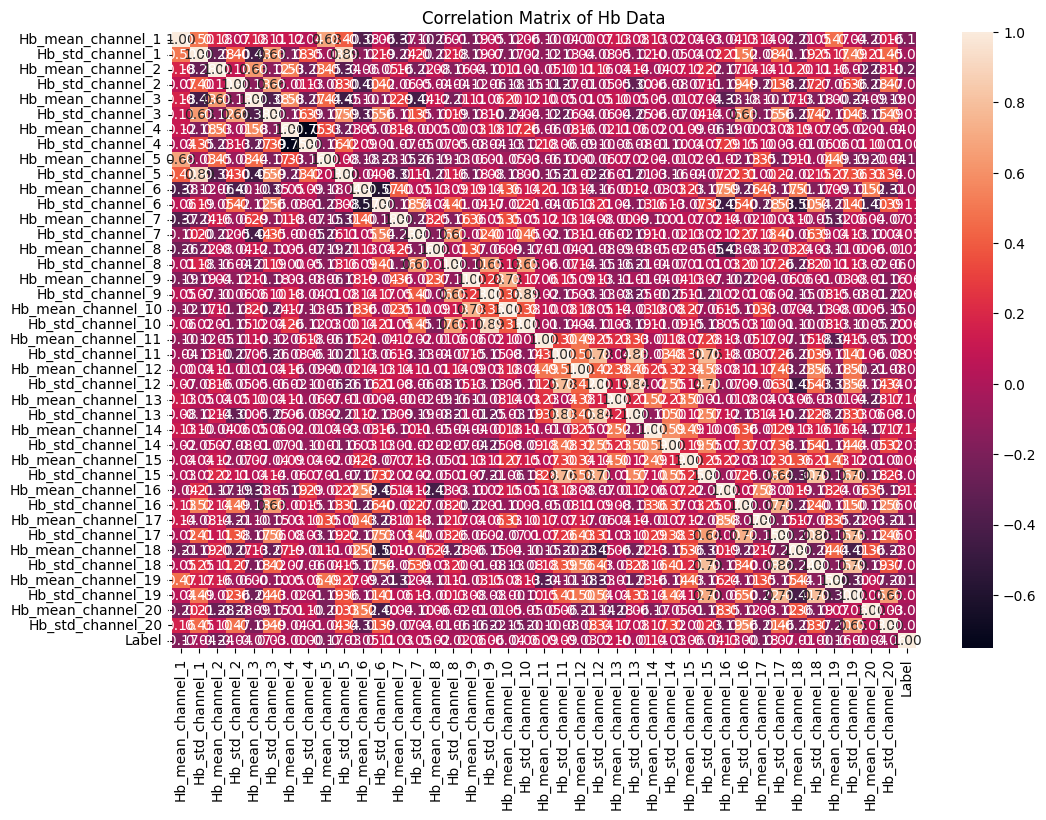

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_columns_hb = hb_df.select_dtypes(include=[np.number])
numeric_columns_hbo = hbo_df.select_dtypes(include=[np.number])

# Visualize the correlation matrices for Hb data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_hb.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Hb Data')
plt.show()



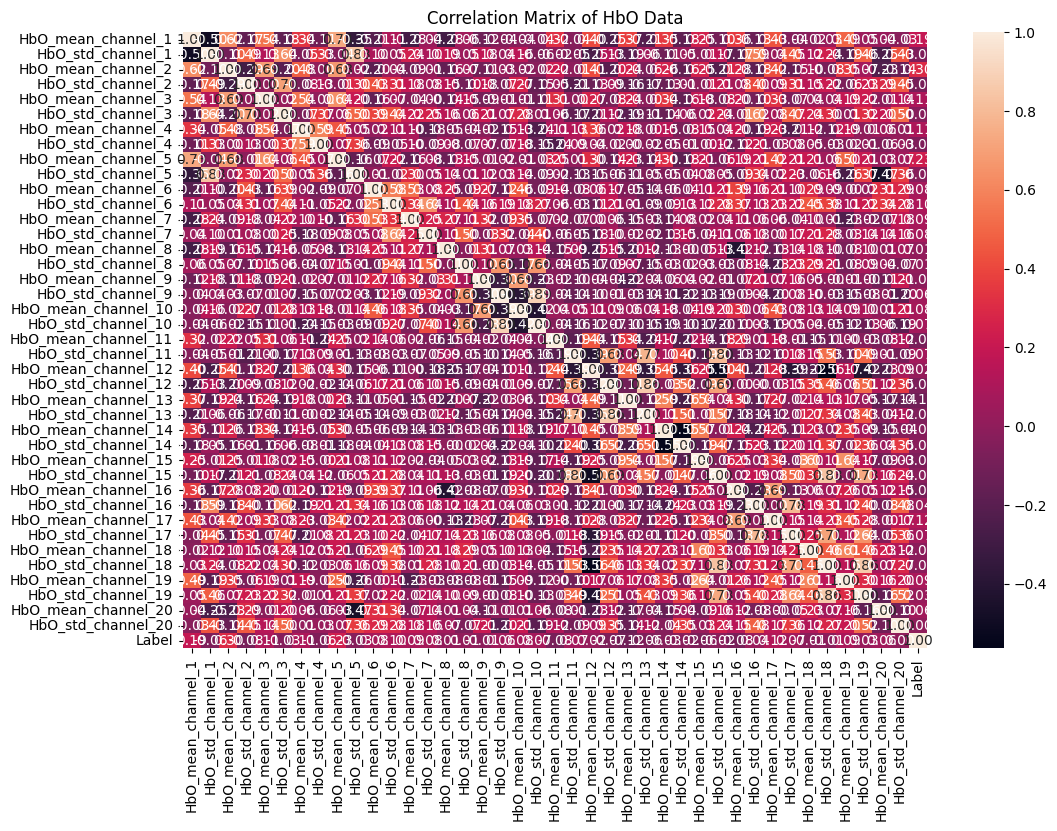

In [14]:
# Visualize the correlation matrices for HbO data
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_hbo.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of HbO Data')
plt.show()


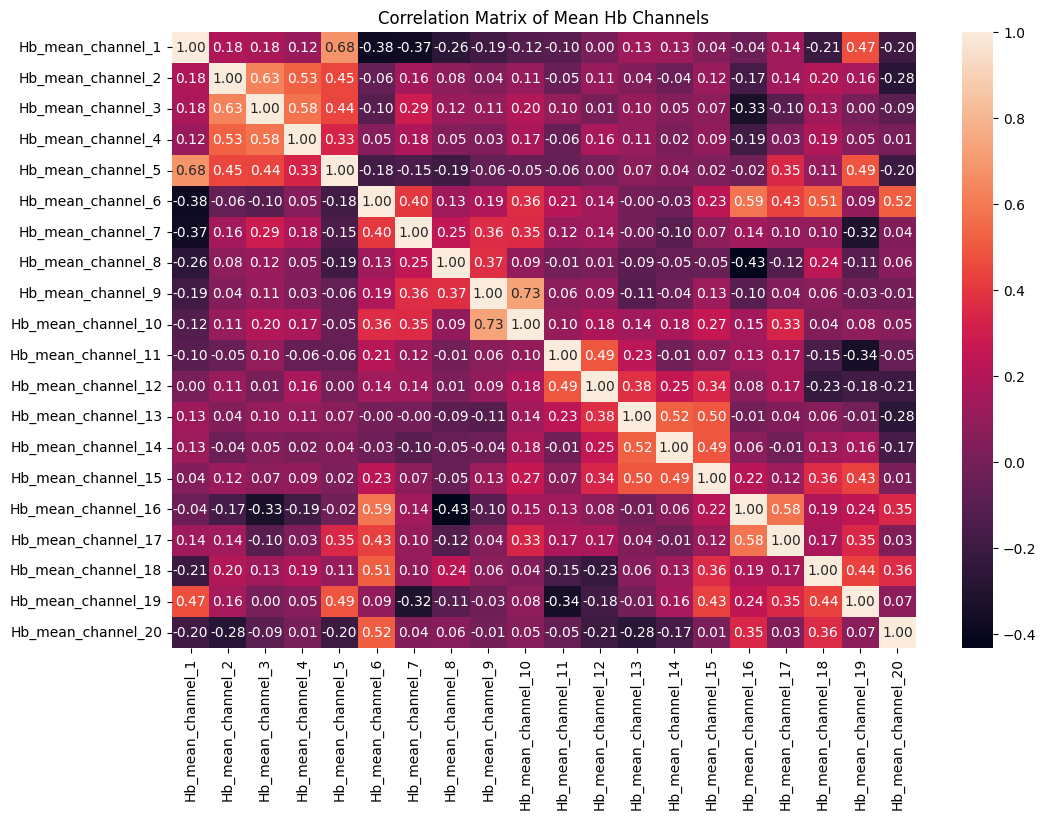

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate columns for mean and standard deviation of Hb
mean_columns_hb = [col for col in hb_df.columns if 'mean' in col]
std_columns_hb = [col for col in hb_df.columns if 'std' in col]

# Separate columns for mean and standard deviation of HbO
mean_columns_hbo = [col for col in hbo_df.columns if 'mean' in col]
std_columns_hbo = [col for col in hbo_df.columns if 'std' in col]

# Select only numeric columns for correlation matrix
mean_df_hb = hb_df[mean_columns_hb]
std_df_hb = hb_df[std_columns_hb]
mean_df_hbo = hbo_df[mean_columns_hbo]
std_df_hbo = hbo_df[std_columns_hbo]

# Visualize the correlation matrices for mean of Hb channels
plt.figure(figsize=(12, 8))
sns.heatmap(mean_df_hb.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Mean Hb Channels')
plt.show()



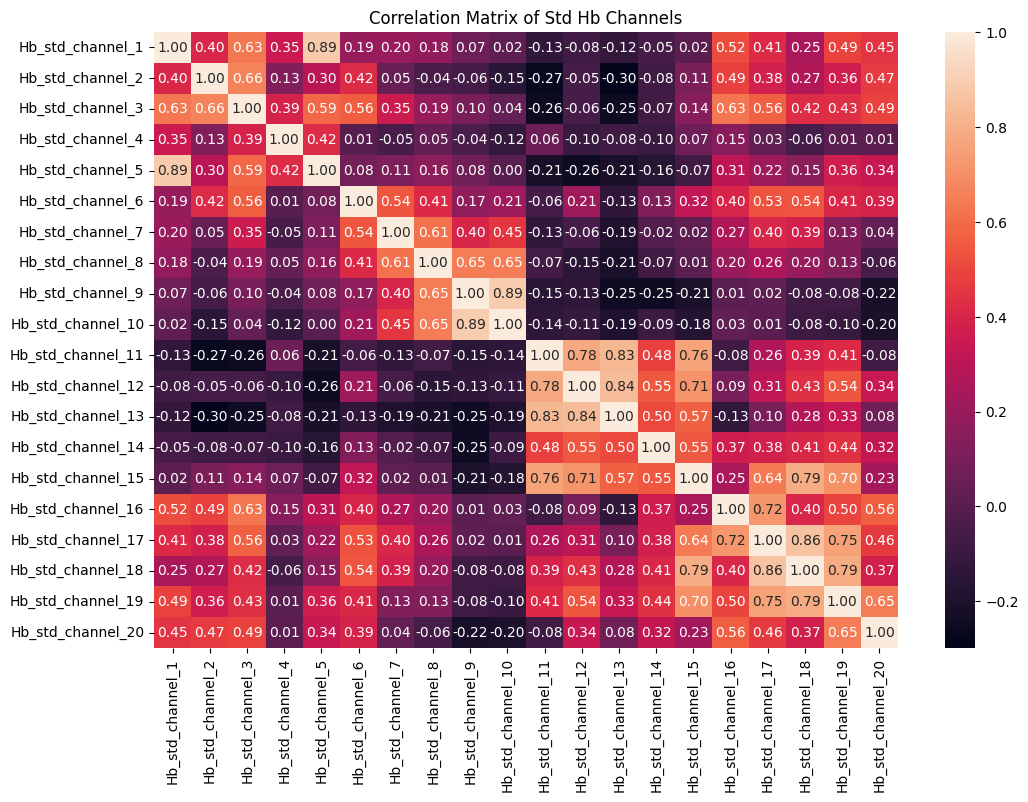

In [16]:
# Visualize the correlation matrices for std of Hb channels
plt.figure(figsize=(12, 8))
sns.heatmap(std_df_hb.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Std Hb Channels')
plt.show()




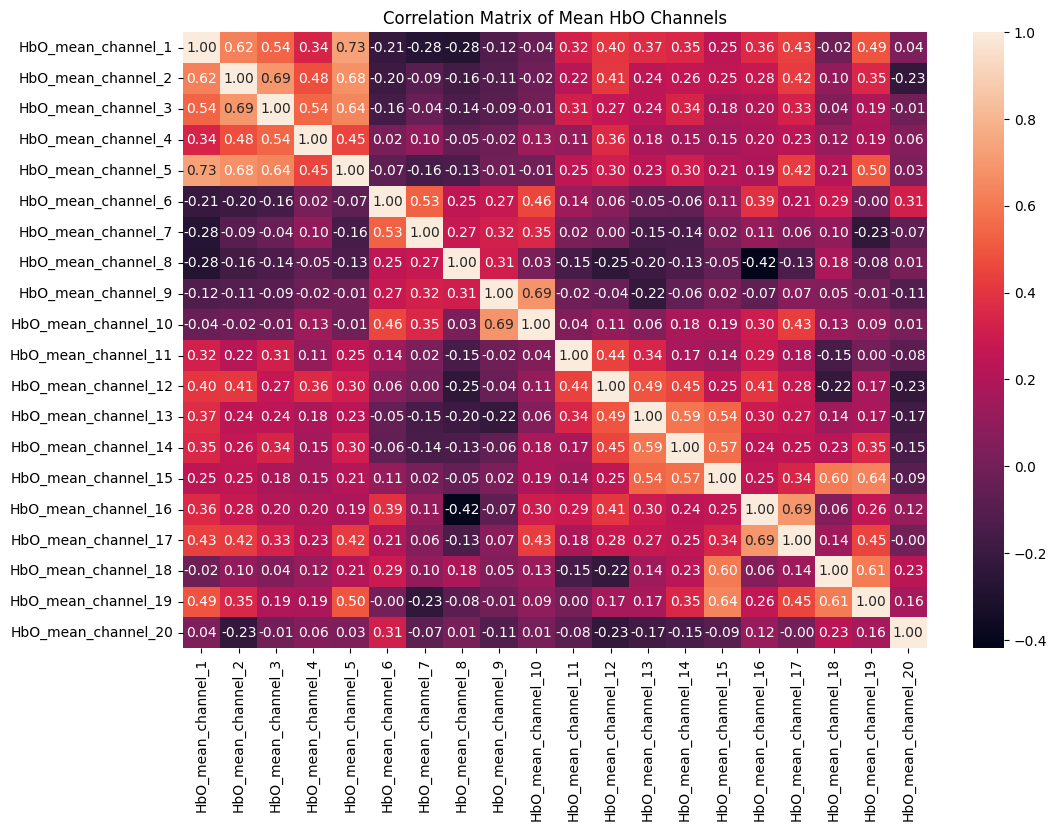

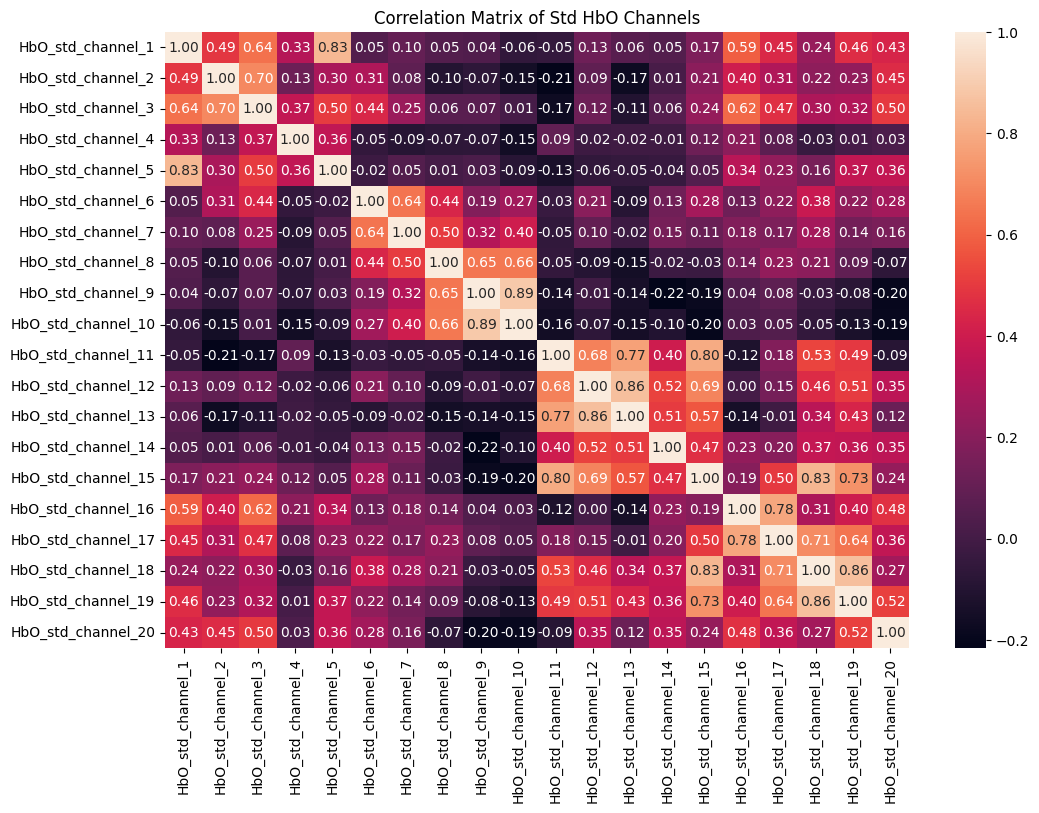

In [17]:
# Visualize the correlation matrices for mean of HbO channels
plt.figure(figsize=(12, 8))
sns.heatmap(mean_df_hbo.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Mean HbO Channels')
plt.show()

# Visualize the correlation matrices for std of HbO channels
plt.figure(figsize=(12, 8))
sns.heatmap(std_df_hbo.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Std HbO Channels')
plt.show()

In [18]:
# Merge the datasets on Participant and Condition
combined_df = pd.merge(hb_df, hbo_df, on=['Participant', 'Condition', 'Label'], suffixes=('_Hb', '_HbO'))

# Display the first few rows of the combined dataset
print("Combined Dataset:")
print(combined_df.head())



Combined Dataset:
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000106          0.000192           0.000063          0.000168   
1          -0.000050          0.000093          -0.000157          0.000112   
2           0.000107          0.000057           0.000137          0.000088   
3          -0.001730          0.003278          -0.001091          0.000937   
4           0.000483          0.000437           0.000453          0.000465   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0           0.000076          0.000152          -0.000166          0.000252   
1          -0.000153          0.000100          -0.000080          0.000076   
2           0.000306          0.000164           0.000259          0.000091   
3          -0.000744          0.000849          -0.000549          0.000719   
4           0.000410          0.000372           0.000462          0.000365   

   Hb_mean_channel_5  Hb_std_cha

In [19]:
# Save the combined dataset to a CSV file
combined_df.to_csv('combined_Hb_HbO_dataset.csv', index=False)
print("Combined dataset saved to 'combined_Hb_HbO_dataset.csv'")


Combined dataset saved to 'combined_Hb_HbO_dataset.csv'


In [2]:
import pandas as pd 
comb = pd.read_csv('combined_Hb_HbO_dataset.csv')

In [3]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hb_mean_channel_1    42 non-null     float64
 1   Hb_std_channel_1     42 non-null     float64
 2   Hb_mean_channel_2    42 non-null     float64
 3   Hb_std_channel_2     42 non-null     float64
 4   Hb_mean_channel_3    42 non-null     float64
 5   Hb_std_channel_3     42 non-null     float64
 6   Hb_mean_channel_4    42 non-null     float64
 7   Hb_std_channel_4     42 non-null     float64
 8   Hb_mean_channel_5    42 non-null     float64
 9   Hb_std_channel_5     42 non-null     float64
 10  Hb_mean_channel_6    42 non-null     float64
 11  Hb_std_channel_6     42 non-null     float64
 12  Hb_mean_channel_7    42 non-null     float64
 13  Hb_std_channel_7     42 non-null     float64
 14  Hb_mean_channel_8    42 non-null     float64
 15  Hb_std_channel_8     42 non-null     float

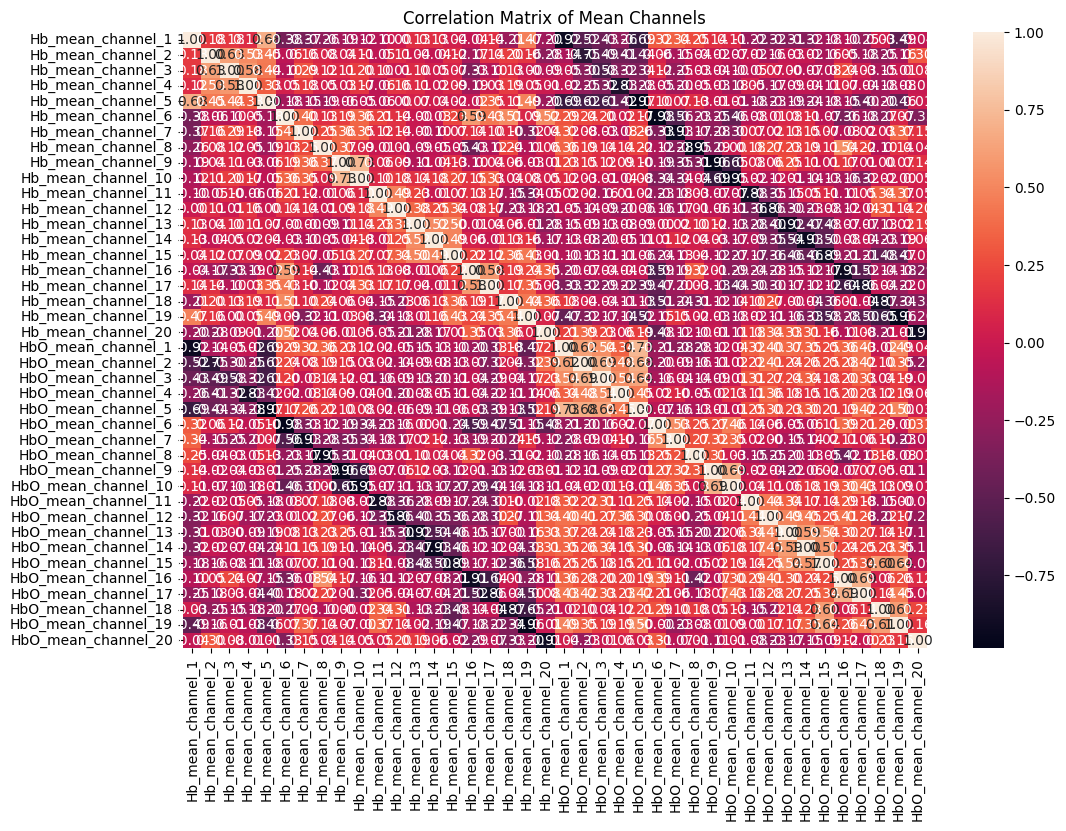

In [22]:
# Separate columns for mean and standard deviation of Hb and HbO
mean_columns = [col for col in comb.columns if 'mean' in col]
std_columns = [col for col in comb.columns if 'std' in col]

mean_df = combined_df[mean_columns]
std_df = combined_df[std_columns]

# Visualize the correlation matrices for mean channels
plt.figure(figsize=(12, 8))
sns.heatmap(mean_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Mean Channels')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and labels
X = comb.drop(['Participant', 'Condition', 'Label'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
comb['Cluster'] = clusters

# Display the first few rows with cluster labels
print("\nFirst Few Rows with Cluster Labels:")
print(comb.head())



First Few Rows with Cluster Labels:
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000106          0.000192           0.000063          0.000168   
1          -0.000050          0.000093          -0.000157          0.000112   
2           0.000107          0.000057           0.000137          0.000088   
3          -0.001730          0.003278          -0.001091          0.000937   
4           0.000483          0.000437           0.000453          0.000465   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0           0.000076          0.000152          -0.000166          0.000252   
1          -0.000153          0.000100          -0.000080          0.000076   
2           0.000306          0.000164           0.000259          0.000091   
3          -0.000744          0.000849          -0.000549          0.000719   
4           0.000410          0.000372           0.000462          0.000365   

   Hb_mean_ch

c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Clustering 

Explanation:
Loading the dataset: Reads the CSV file containing the dataset.
Selecting relevant columns: Chooses Hb_mean_channel_1 and HbO_mean_channel_1 for clustering.
Normalizing the data: Scales the data using StandardScaler.
Applying K-means clustering: Performs K-means clustering with 3 clusters.
Inverse transforming the cluster centers: Converts cluster centers back to the original scale for interpretation.
Visualizing the clusters: Creates a scatter plot to visualize the clusters.
Assigning mental workload levels: Assigns workload levels to each cluster and maps these levels back to the dataframe.
Displaying the first few rows: Prints the first few rows of the dataframe with the new Cluster and Workload columns.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
file_path = 'combined_Hb_HbO_dataset.csv'
combined_df = pd.read_csv(file_path)

# Inspect column names
print(combined_df.columns)

# Assuming 'Hb_mean_channel_1_Hb' and 'HbO_mean_channel_1_HbO' are valid column names
x_col = 'Hb_mean_channel_1_Hb'
y_col = 'HbO_mean_channel_1_HbO'

# Separate features and labels (excluding 'Participant', 'Condition', 'Label', and 'Cluster' if present)
X = combined_df.drop(['Participant', 'Condition', 'Label', 'Cluster', 'Workload'], axis=1, errors='ignore')



Index(['Hb_mean_channel_1', 'Hb_std_channel_1', 'Hb_mean_channel_2',
       'Hb_std_channel_2', 'Hb_mean_channel_3', 'Hb_std_channel_3',
       'Hb_mean_channel_4', 'Hb_std_channel_4', 'Hb_mean_channel_5',
       'Hb_std_channel_5', 'Hb_mean_channel_6', 'Hb_std_channel_6',
       'Hb_mean_channel_7', 'Hb_std_channel_7', 'Hb_mean_channel_8',
       'Hb_std_channel_8', 'Hb_mean_channel_9', 'Hb_std_channel_9',
       'Hb_mean_channel_10', 'Hb_std_channel_10', 'Hb_mean_channel_11',
       'Hb_std_channel_11', 'Hb_mean_channel_12', 'Hb_std_channel_12',
       'Hb_mean_channel_13', 'Hb_std_channel_13', 'Hb_mean_channel_14',
       'Hb_std_channel_14', 'Hb_mean_channel_15', 'Hb_std_channel_15',
       'Hb_mean_channel_16', 'Hb_std_channel_16', 'Hb_mean_channel_17',
       'Hb_std_channel_17', 'Hb_mean_channel_18', 'Hb_std_channel_18',
       'Hb_mean_channel_19', 'Hb_std_channel_19', 'Hb_mean_channel_20',
       'Hb_std_channel_20', 'Condition', 'Participant', 'Label',
       'HbO_mean_channe

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with cluster labels
print("\nFirst Few Rows with Cluster Labels:")
print(combined_df.head())




First Few Rows with Cluster Labels:
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000106          0.000192           0.000063          0.000168   
1          -0.000050          0.000093          -0.000157          0.000112   
2           0.000107          0.000057           0.000137          0.000088   
3          -0.001730          0.003278          -0.001091          0.000937   
4           0.000483          0.000437           0.000453          0.000465   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0           0.000076          0.000152          -0.000166          0.000252   
1          -0.000153          0.000100          -0.000080          0.000076   
2           0.000306          0.000164           0.000259          0.000091   
3          -0.000744          0.000849          -0.000549          0.000719   
4           0.000410          0.000372           0.000462          0.000365   

   Hb_mean_ch

c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Inverse transform the cluster centers to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)

print("\nCluster Centers (Original Scale):")
print(cluster_df)


Cluster Centers (Original Scale):
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000031          0.000316          -0.000089          0.000308   
1           0.000032          0.000220           0.000104          0.000332   
2           0.000587          0.001093           0.000017          0.000642   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0          -0.000057          0.000295          -0.000079          0.000270   
1           0.000040          0.000200          -0.000219          0.000331   
2          -0.000214          0.000480          -0.000129          0.000272   

   Hb_mean_channel_5  Hb_std_channel_5  ...  HbO_mean_channel_16  \
0          -0.000076          0.000291  ...             0.000030   
1           0.000152          0.000241  ...            -0.000176   
2           0.000007          0.000500  ...             0.000044   

   HbO_std_channel_16  HbO_mean_channel_17  HbO_std_channe

In [14]:
# Save the labeled dataset to a CSV file
output_file_path = 'combined_Hb_HbO_with_workload.csv'
combined_df.to_csv(output_file_path, index=False)
print(f"Labeled dataset saved to '{output_file_path}'")

Labeled dataset saved to 'combined_Hb_HbO_with_workload.csv'


c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Centers (Original Scale):
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000031          0.000316          -0.000089          0.000308   
1           0.000032          0.000220           0.000104          0.000332   
2           0.000587          0.001093           0.000017          0.000642   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0          -0.000057          0.000295          -0.000079          0.000270   
1           0.000040          0.000200          -0.000219          0.000331   
2          -0.000214          0.000480          -0.000129          0.000272   

   Hb_mean_channel_5  Hb_std_channel_5  ...  HbO_mean_channel_16  \
0          -0.000076          0.000291  ...             0.000030   
1           0.000152          0.000241  ...            -0.000176   
2           0.000007          0.000500  ...             0.000044   

   HbO_std_channel_16  HbO_mean_channel_17  HbO_std_channe

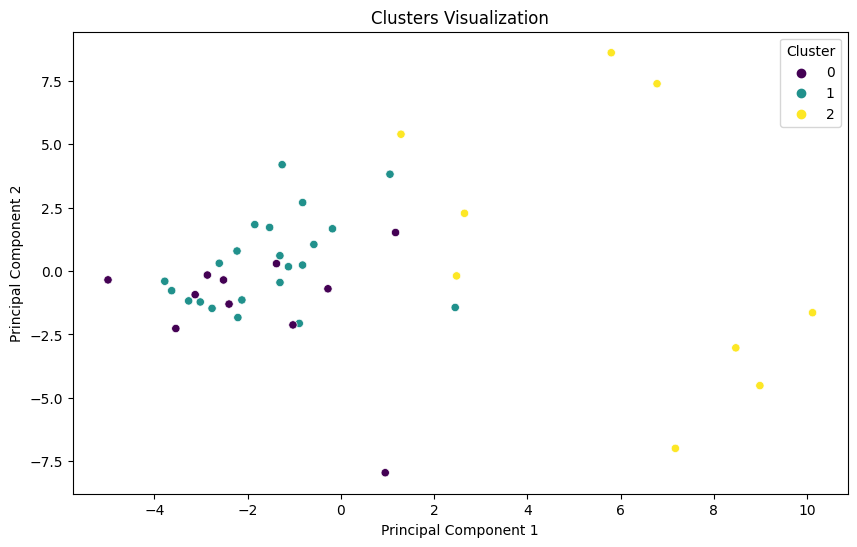


First Few Rows with Workload Labels:
   Hb_mean_channel_1  Hb_std_channel_1  Hb_mean_channel_2  Hb_std_channel_2  \
0          -0.000106          0.000192           0.000063          0.000168   
1          -0.000050          0.000093          -0.000157          0.000112   
2           0.000107          0.000057           0.000137          0.000088   
3          -0.001730          0.003278          -0.001091          0.000937   
4           0.000483          0.000437           0.000453          0.000465   

   Hb_mean_channel_3  Hb_std_channel_3  Hb_mean_channel_4  Hb_std_channel_4  \
0           0.000076          0.000152          -0.000166          0.000252   
1          -0.000153          0.000100          -0.000080          0.000076   
2           0.000306          0.000164           0.000259          0.000091   
3          -0.000744          0.000849          -0.000549          0.000719   
4           0.000410          0.000372           0.000462          0.000365   

   Hb_mean_c

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_Hb_HbO_dataset.csv'
combined_df = pd.read_csv(file_path)

# Select all relevant columns for clustering (all mean and std columns)
relevant_columns = [col for col in combined_df.columns if 'Hb_mean' in col or 'HbO_mean' in col or 'Hb_std' in col or 'HbO_std' in col]
X = combined_df[relevant_columns]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Inverse transform the cluster centers to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)

print("\nCluster Centers (Original Scale):")
print(cluster_df)

# Visualize the clusters using the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = combined_df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Assign mental workload levels based on clusters
cluster_df['Workload'] = ['Low', 'Mid', 'High']  # Adjust these based on your analysis

# Merge the workload labels back to the combined dataframe
workload_map = {i: workload for i, workload in enumerate(cluster_df['Workload'])}
combined_df['Workload'] = combined_df['Cluster'].map(workload_map)

# Display the first few rows with workload labels
print("\nFirst Few Rows with Workload Labels:")
print(combined_df.head())


## Visulaizing the clustered datset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the labeled dataset
file_path = 'Hb_HbO_with_workload.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Basic Information:")
print(df.info())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hb_mean_channel_1    42 non-null     float64
 1   Hb_std_channel_1     42 non-null     float64
 2   Hb_mean_channel_2    42 non-null     float64
 3   Hb_std_channel_2     42 non-null     float64
 4   Hb_mean_channel_3    42 non-null     float64
 5   Hb_std_channel_3     42 non-null     float64
 6   Hb_mean_channel_4    42 non-null     float64
 7   Hb_std_channel_4     42 non-null     float64
 8   Hb_mean_channel_5    42 non-null     float64
 9   Hb_std_channel_5     42 non-null     float64
 10  Hb_mean_channel_6    42 non-null     float64
 11  Hb_std_channel_6     42 non-null     float64
 12  Hb_mean_channel_7    42 non-null     float64
 13  Hb_std_channel_7     42 non-null     float64
 14  Hb_mean_channel_8    42 non-null     float64
 15  Hb_std_channel_8     42

In [2]:

# Display the distribution of the clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Display the distribution of the workload levels
print("\nWorkload Distribution:")
print(df['Workload'].value_counts())




Cluster Distribution:
Cluster
1    22
0    11
2     9
Name: count, dtype: int64

Workload Distribution:
Workload
Mid     22
Low     11
High     9
Name: count, dtype: int64


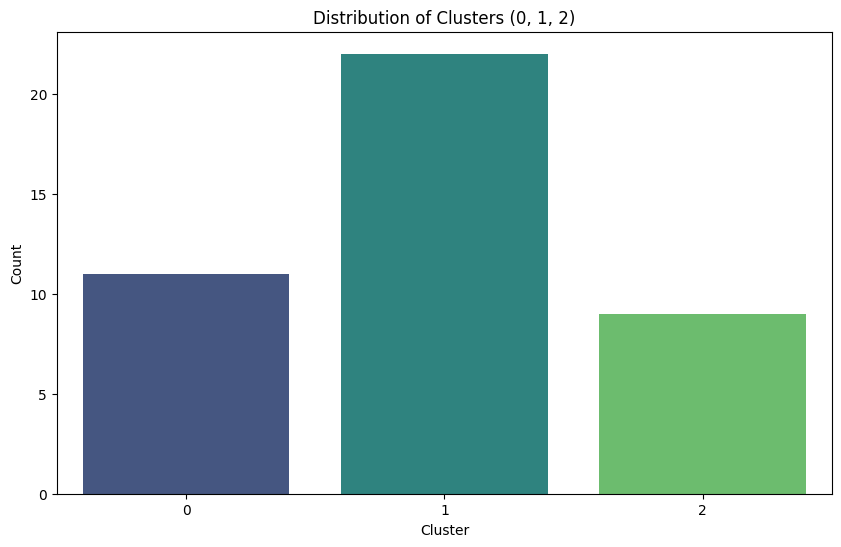

In [19]:
# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Clusters (0, 1, 2)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()



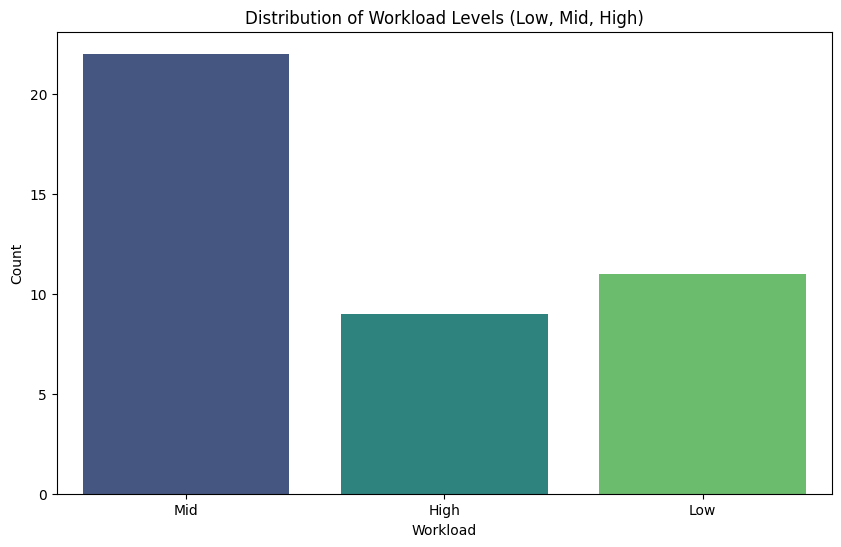

In [20]:
# Plot the distribution of workload levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Workload', data=df, palette='viridis')
plt.title('Distribution of Workload Levels (Low, Mid, High)')
plt.xlabel('Workload')
plt.ylabel('Count')
plt.show()




In [ ]:
# Plot pairplot to visualize relationships between features and clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()

# Plot pairplot to visualize relationships between features and workload levels
sns.pairplot(df, hue='Workload', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Workload Level', y=1.02)
plt.show()


In [4]:
# Display the column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['Hb_mean_channel_1', 'Hb_std_channel_1', 'Hb_mean_channel_2',
       'Hb_std_channel_2', 'Hb_mean_channel_3', 'Hb_std_channel_3',
       'Hb_mean_channel_4', 'Hb_std_channel_4', 'Hb_mean_channel_5',
       'Hb_std_channel_5', 'Hb_mean_channel_6', 'Hb_std_channel_6',
       'Hb_mean_channel_7', 'Hb_std_channel_7', 'Hb_mean_channel_8',
       'Hb_std_channel_8', 'Hb_mean_channel_9', 'Hb_std_channel_9',
       'Hb_mean_channel_10', 'Hb_std_channel_10', 'Hb_mean_channel_11',
       'Hb_std_channel_11', 'Hb_mean_channel_12', 'Hb_std_channel_12',
       'Hb_mean_channel_13', 'Hb_std_channel_13', 'Hb_mean_channel_14',
       'Hb_std_channel_14', 'Hb_mean_channel_15', 'Hb_std_channel_15',
       'Hb_mean_channel_16', 'Hb_std_channel_16', 'Hb_mean_channel_17',
       'Hb_std_channel_17', 'Hb_mean_channel_18', 'Hb_std_channel_18',
       'Hb_mean_channel_19', 'Hb_std_channel_19', 'Hb_mean_channel_20',
       'Hb_std_channel_20', 'Condition', 'Participant', 'Label',
       'H

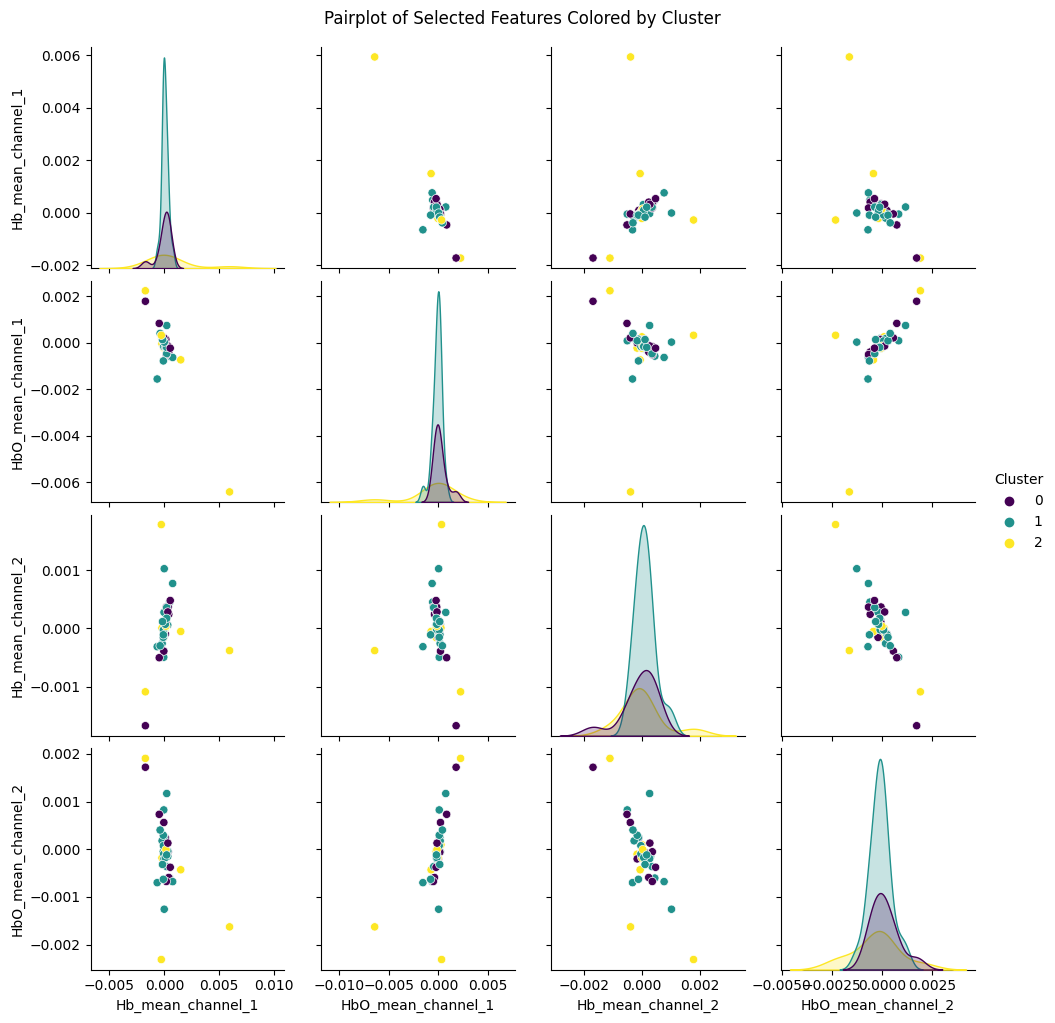

In [5]:
# Select key features for pairplot
key_features = ['Hb_mean_channel_1', 'HbO_mean_channel_1','Hb_mean_channel_2', 'HbO_mean_channel_2']

# Plot pairplot to visualize relationships between selected features and clusters
sns.pairplot(df[key_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Selected Features Colored by Cluster', y=1.02)
plt.show()

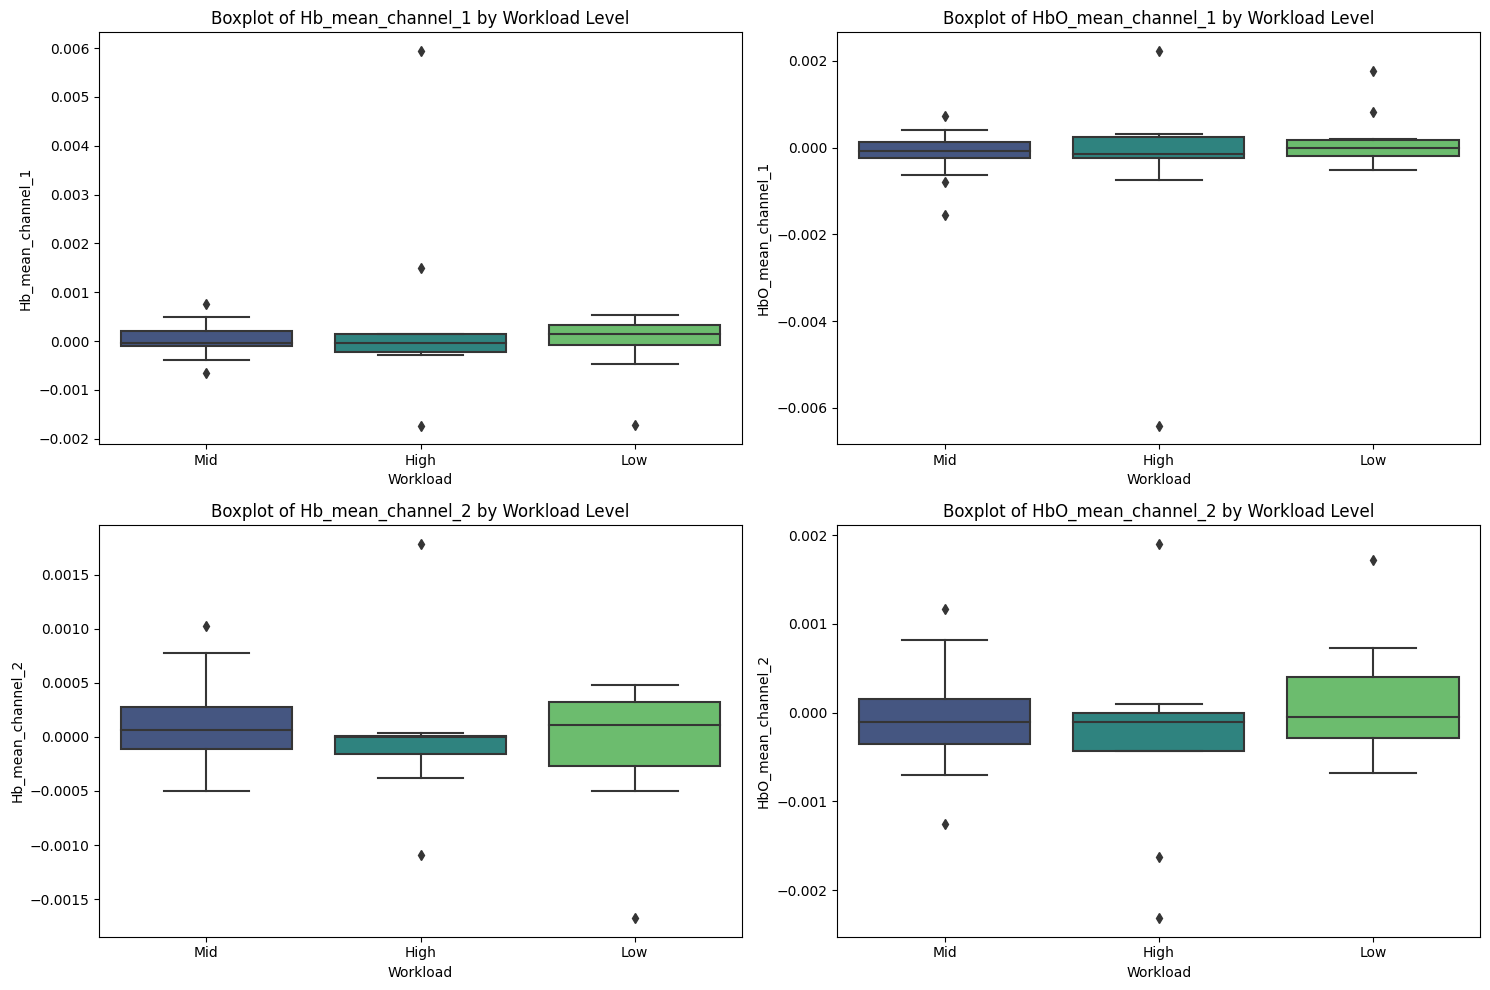

In [6]:
# Plot boxplots to show the distribution of feature values within each workload level
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Workload', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature} by Workload Level')
    plt.xlabel('Workload')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

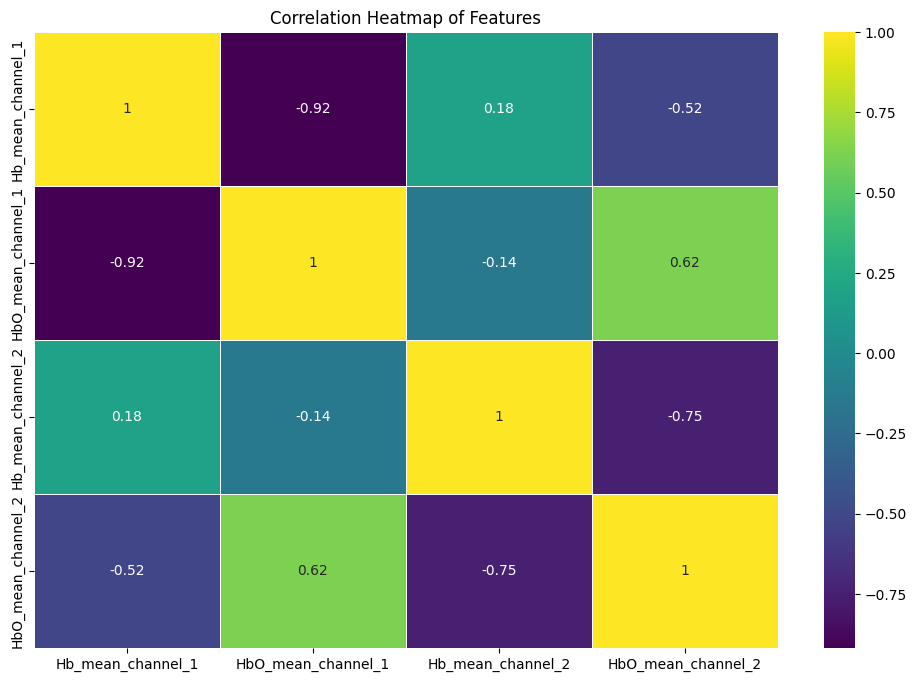

In [8]:
# Plot heatmap to show the correlation between features
plt.figure(figsize=(12, 8))
corr_matrix = df[key_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Plot pairplot to visualize relationships between features and workload levels
sns.pairplot(df, hue='Workload', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Workload Level', y=1.02)
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the labeled dataset
file_path = 'Hb_HbO_with_workload.csv'
df = pd.read_csv(file_path)



In [24]:


# Encode the 'Workload' labels
label_encoder = LabelEncoder()
df['Workload'] = label_encoder.fit_transform(df['Workload'])

# Define features and target
excluded_features = ['Participant', 'Condition', 'Cluster', 'Workload']
X = df.drop(columns=excluded_features)
y = df['Workload']



In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.88      1.00      0.93         7

    accuracy                           0.89         9
   macro avg       0.62      0.67      0.64         9
weighted avg       0.79      0.89      0.84         9

Confusion Matrix:
[[0 0 1]
 [0 1 0]
 [0 0 7]]


c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

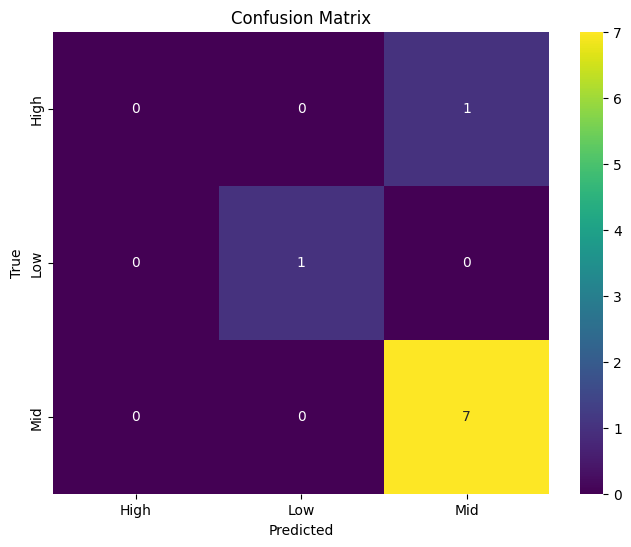

In [26]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




In [27]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8888888888888888


## SAVING THE MODEL 

In [28]:

import joblib


# Save the trained model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save feature columns used for training
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.pkl')

# Print confirmation
print("Model, scaler, and feature columns saved successfully.")


Model, scaler, and feature columns saved successfully.


## Gradient Boosting Classifier 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier - Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Classifier - Confusion Matrix:")
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)





Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Gradient Boosting Classifier - Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 7]]


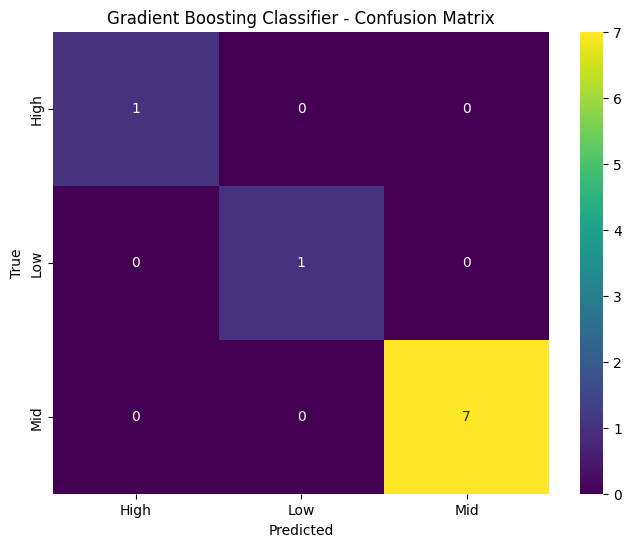

Gradient Boosting Classifier - Accuracy Score:
1.0


In [19]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Gradient Boosting Classifier - Accuracy Score:")
print(accuracy_score(y_test, y_pred_gb))



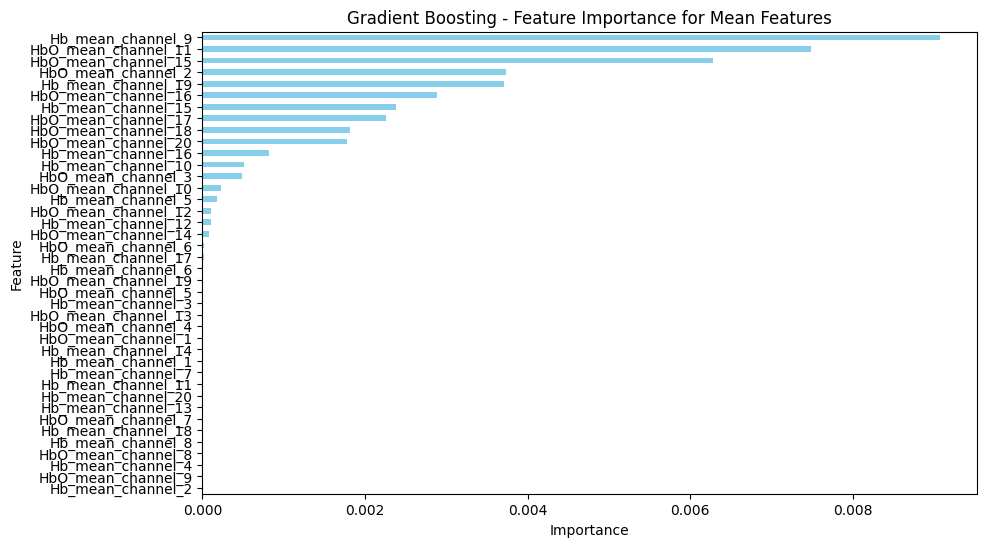

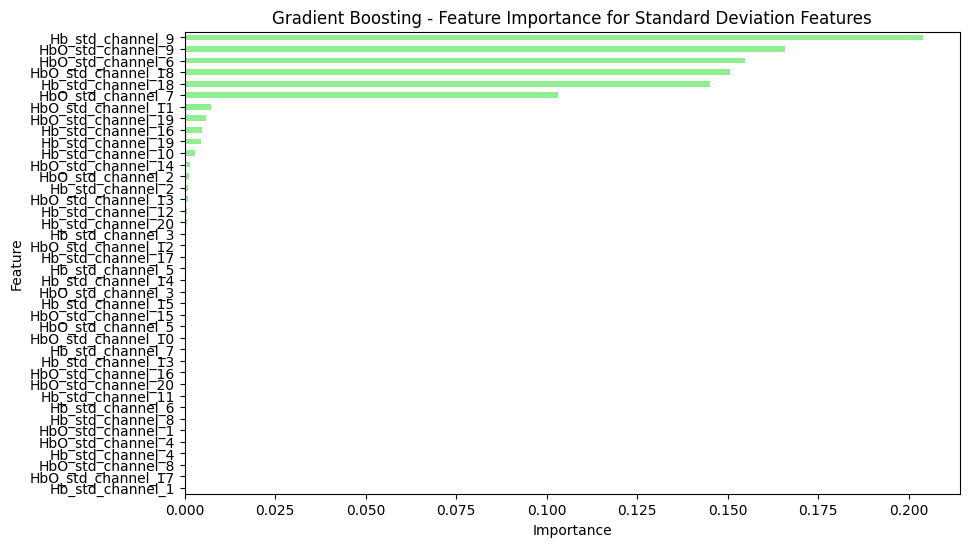

In [20]:
# Feature Importance
feature_importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)

# Separate mean and standard deviation features
mean_features = [col for col in X.columns if 'mean' in col]
std_features = [col for col in X.columns if 'std' in col]

# Plot feature importance for mean features
plt.figure(figsize=(10, 6))
mean_importances_gb = feature_importances_gb[mean_features].sort_values()
mean_importances_gb.plot(kind='barh', color='skyblue')
plt.title('Gradient Boosting - Feature Importance for Mean Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot feature importance for standard deviation features
plt.figure(figsize=(10, 6))
std_importances_gb = feature_importances_gb[std_features].sort_values()
std_importances_gb.plot(kind='barh', color='lightgreen')
plt.title('Gradient Boosting - Feature Importance for Standard Deviation Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Support Vector Machine Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Support Vector Machine Classifier - Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 7]]


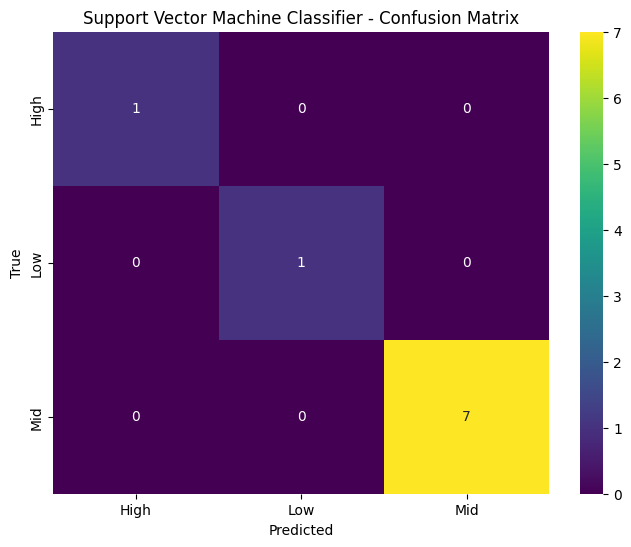

Support Vector Machine Classifier - Accuracy Score:
1.0


In [21]:
from sklearn.svm import SVC

# Train a Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine Classifier - Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Support Vector Machine Classifier - Confusion Matrix:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Support Vector Machine Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Support Vector Machine Classifier - Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

In [29]:
import pandas as pd

# Load the dataset
file_path = 'Hb_HbO_with_workload.csv'
df = pd.read_csv(file_path)

# Inspect the 'Participant' column
print("Unique Participant values before replacement:", df['Participant'].unique())

# Replace the 'Participant' column values
participant_mapping = {f'Sheet{i}': f'Participant {i}' for i in range(1, len(df['Participant'].unique()) + 1)}
df['Participant'] = df['Participant'].map(participant_mapping)

# Verify the replacement
print("Unique Participant values after replacement:", df['Participant'].unique())

# Save the updated dataset back to the same file
df.to_csv(file_path, index=False)
print("Updated dataset saved to the same file: 'Hb_HbO_with_workload.csv'")


Unique Participant values before replacement: ['Sheet1' 'Sheet2' 'Sheet3' 'Sheet4' 'Sheet5' 'Sheet6' 'Sheet7' 'Sheet8'
 'Sheet9' 'Sheet10' 'Sheet11' 'Sheet12' 'Sheet13' 'Sheet14' 'Sheet15'
 'Sheet16' 'Sheet17' 'Sheet18' 'Sheet19' 'Sheet20' 'Sheet21']
Unique Participant values after replacement: ['Participant 1' 'Participant 2' 'Participant 3' 'Participant 4'
 'Participant 5' 'Participant 6' 'Participant 7' 'Participant 8'
 'Participant 9' 'Participant 10' 'Participant 11' 'Participant 12'
 'Participant 13' 'Participant 14' 'Participant 15' 'Participant 16'
 'Participant 17' 'Participant 18' 'Participant 19' 'Participant 20'
 'Participant 21']
Updated dataset saved to the same file: 'Hb_HbO_with_workload.csv'
